#CASE STUDY: Credit Card Application

####Description: A dataset with Credit Card applicant.

####Objective:
* Determine the optimal number of segments for the dataset.
* Use Gaussian Mixture Model
* Interpret the segments and name them according to their characteristics

#Libraries, Data, Directory

In [2]:
%cd /content/drive/MyDrive/Business Analyst/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst/Segmentation/Gaussian Mixture Model


In [4]:
#Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [5]:
#Upload data
df = pd.read_csv('CreditCard.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [11]:
#Transform character variables
df = pd.get_dummies(df, drop_first = True)
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,True,True,False
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,True,False,False


#Akaike's information Criterion (AIC) & Bayesian information Criterion (BIC)

**Key ideas:**
* AIC and BIC helps determine the optimal number of clusters
* AIC and BIC provides a means to select a model
* Trade-off between simplicity and goodness of fit
* Deal with overfitting
* BIC penalizes overfitting more than the AIC

##Gaussian Mixture Model

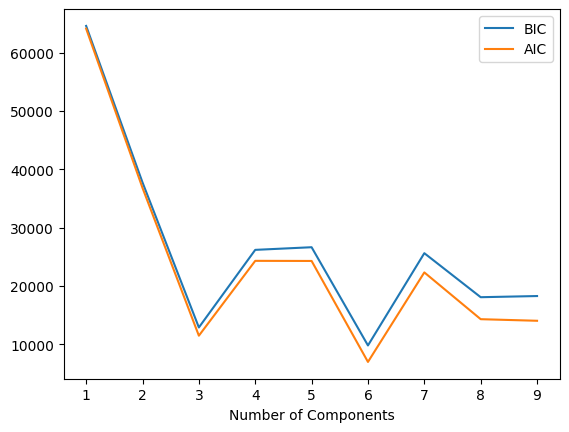

In [14]:
#Finding optimal number of clusters
#Prepare
n_components = np.arange(1, 10)

#Create GMM model
models = [GaussianMixture(n_components= n,
                          random_state = 1502).fit(df) for n in n_components]

#Plot
plt.plot(n_components,
         [m.bic(df) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(df) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('Number of Components')
plt.show()

We see there is a minimum of '3', increases then declines to '8'.

We can choose either three, eight or both as the lowest values. or both if we choose to compare the values.

In [15]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 3,
                        random_state = 1502).fit(df)

#Interpretation

In [18]:
#Predict the cluster for each customer
cluster = pd.Series(model.predict(df))
cluster [:2]

,0
0,1
1,1


In [19]:
#Create Cluster variables
df['cluster'] = cluster
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,True,True,False,1
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,True,False,False,1


In [21]:
#Check how many people per Cluster
df.cluster.value_counts()

,count
cluster,
1,720
2,303
0,296


In [24]:
#Interpretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000
2,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921


In [ ]:
#Names:
#Cluster 0: Non-Credit Users
#Cluster 1: Successful Entrepreneurs
#Cluster 2: Young employees